In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, KFold 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [6]:
# Y = df['diagnosis']
# true_unique = np.unique(Y)    # [M, B]
# true_to_int = {label: idx for idx, label in enumerate(true_unique)}  # {M : 0, B : 1}
# df['diagnosis'] = np.array([true_to_int[label] for label in Y])
# OR You can just
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

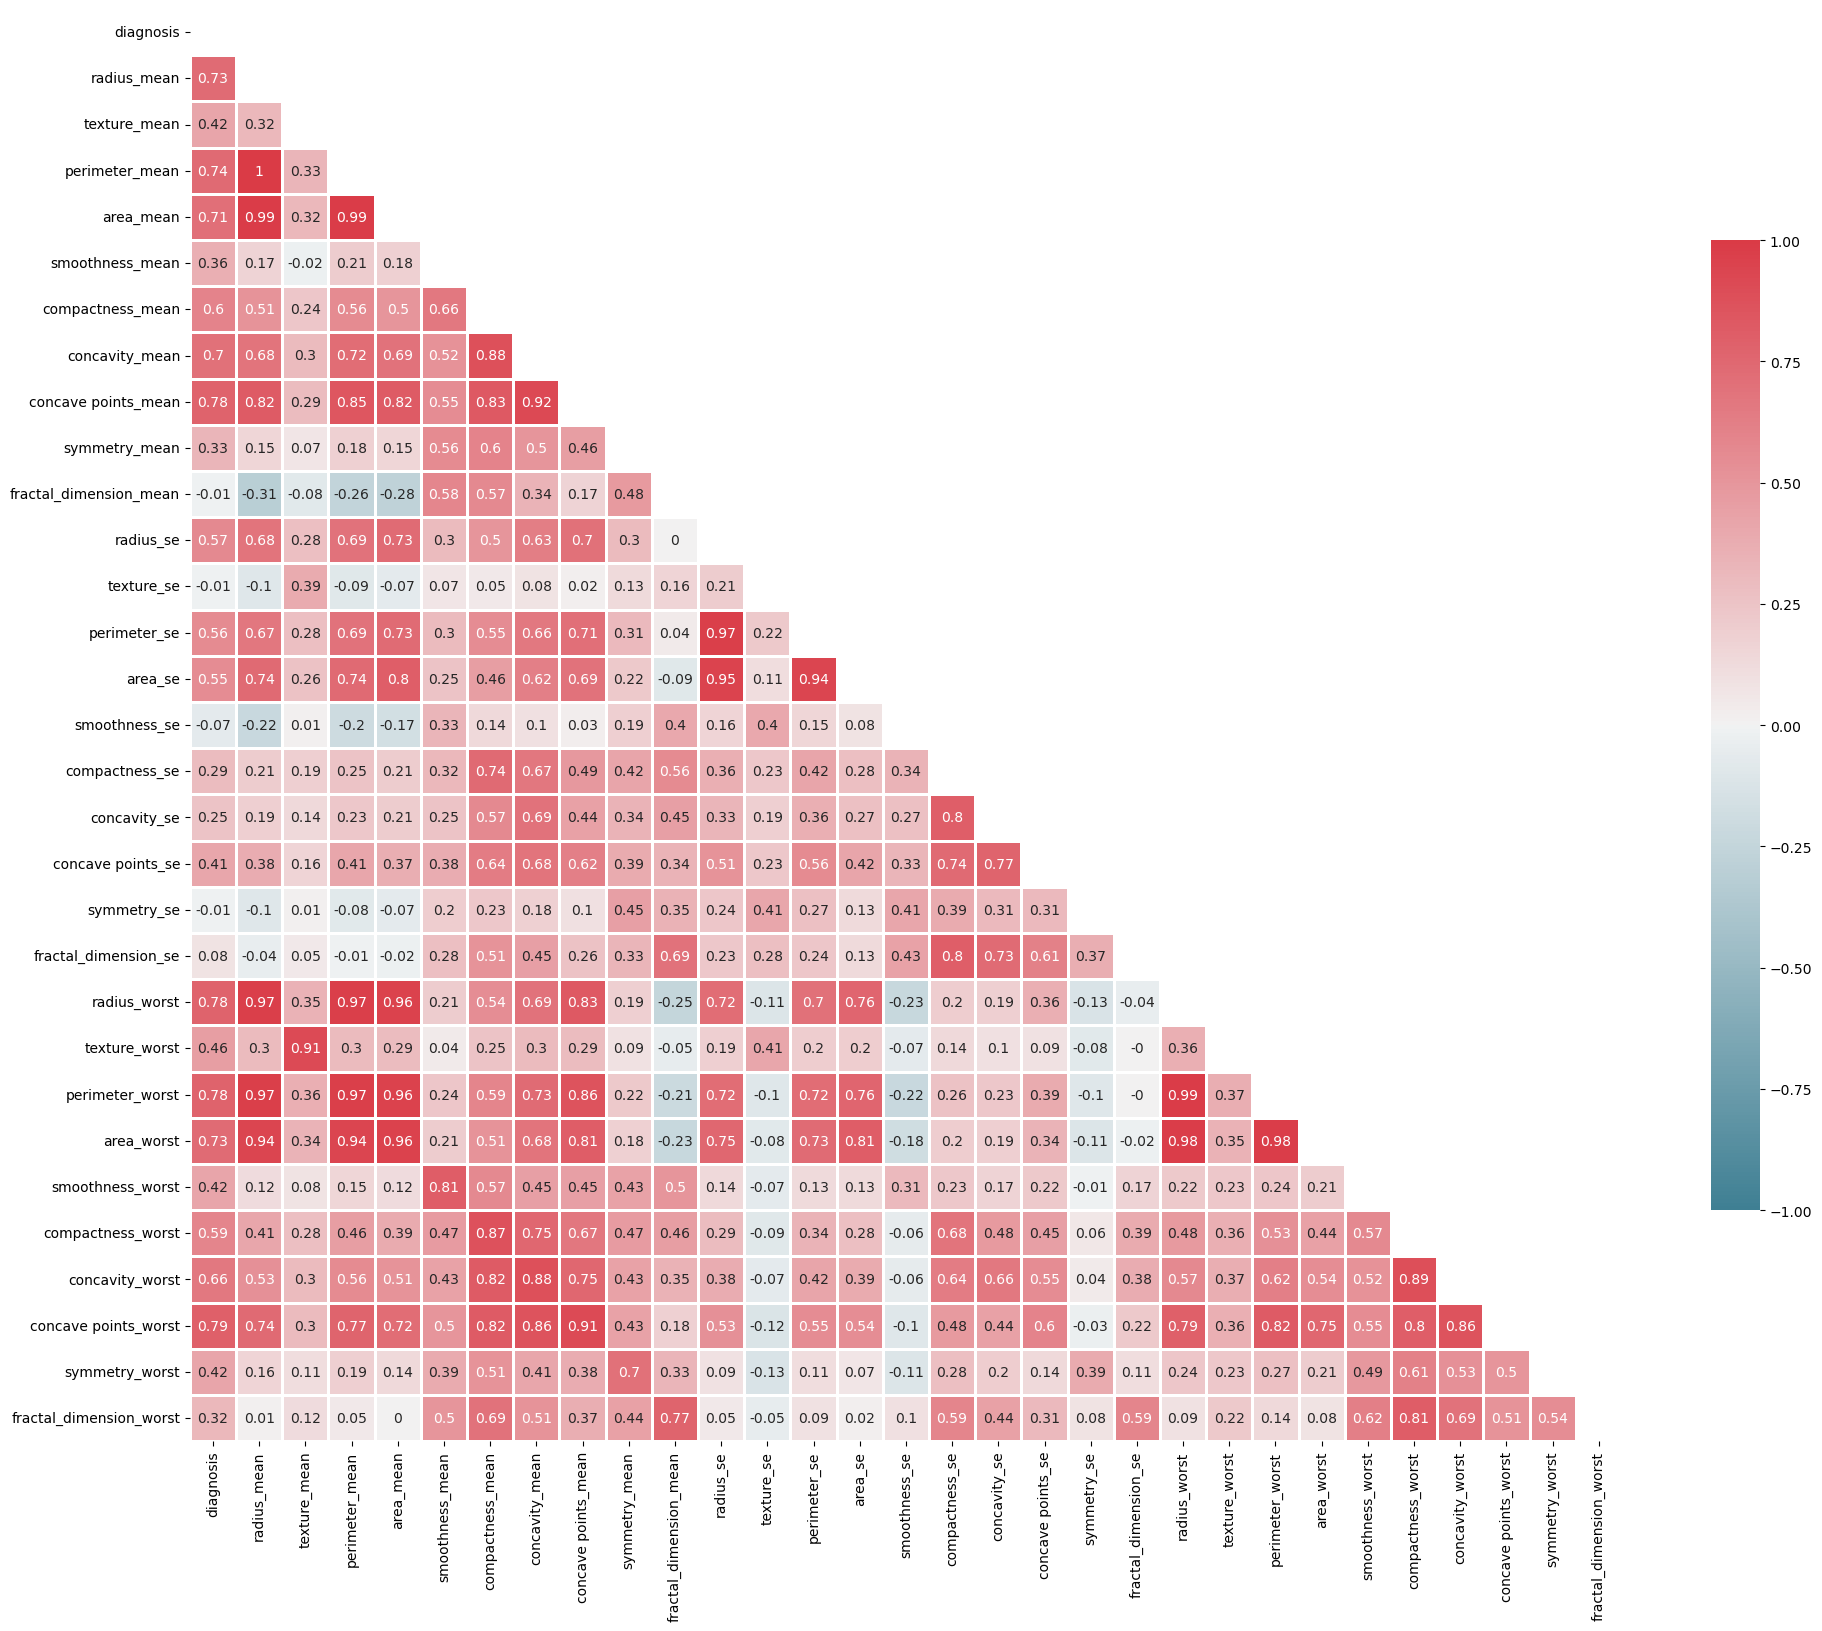

In [7]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, linewidths=.90, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [8]:
# multicollienartiy is apparent is between the "mean" columns and the "worst" column.

cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)

#  the radius_mean column has a correlation of 1 and 0.99 with perimeter_mean and area_mean columns and so also the radius_se with perimeter_se and area_se.
# This is because the three columns essentially contain the same information, which is the physical size of the observation (the cell).
# Therefore we should only pick ONE of the three columns when we go into further analysis.

cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
df = df.drop(cols, axis=1)

# also there is multicollinearity between the attributes compactness, concavity, and concave points.
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)

df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

In [9]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_indicies, test_indicies in split.split(df, df[['diagnosis']]):
    train_set = df.loc[train_indicies]
    test_set = df.loc[test_indicies]

<Axes: >

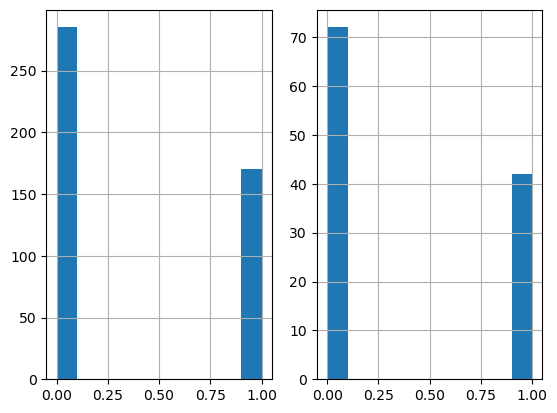

In [10]:
plt.subplot(1,2,1)
train_set['diagnosis'].hist()
plt.subplot(1,2,2)
test_set['diagnosis'].hist()

In [11]:
train_set.corr()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
diagnosis,1.000000,0.728160,0.413595,0.388584,0.606479,0.341308,0.005534,0.558572,-0.006663,-0.056654,0.284951,0.006430,0.070343
radius_mean,0.728160,1.000000,0.326358,0.188805,0.526901,0.148416,-0.294777,0.678727,-0.074570,-0.186078,0.232128,-0.075719,-0.024908
texture_mean,0.413595,0.326358,1.000000,-0.011749,0.246818,0.089454,-0.068576,0.261062,0.382567,0.017520,0.199001,0.010040,0.058216
smoothness_mean,0.388584,0.188805,-0.011749,1.000000,0.668208,0.558946,0.592764,0.323464,0.026994,0.329556,0.309327,0.182429,0.264116
compactness_mean,0.606479,0.526901,0.246818,0.668208,1.000000,0.608154,0.560300,0.513541,0.050368,0.137354,0.733488,0.241224,0.491543
symmetry_mean,0.341308,0.148416,0.089454,0.558946,0.608154,1.000000,0.496995,0.311663,0.129987,0.215386,0.440840,0.451956,0.340059
fractal_dimension_mean,0.005534,-0.294777,-0.068576,0.592764,0.560300,0.496995,1.000000,0.017740,0.154491,0.371365,0.546283,0.332837,0.664750
radius_se,0.558572,0.678727,0.261062,0.323464,0.513541,0.311663,0.017740,1.000000,0.230496,0.197320,0.377856,0.273590,0.235799
texture_se,-0.006663,-0.074570,0.382567,0.026994,0.050368,0.129987,0.154491,0.230496,1.000000,0.364789,0.227635,0.392293,0.285199
smoothness_se,-0.056654,-0.186078,0.017520,0.329556,0.137354,0.215386,0.371365,0.197320,0.364789,1.000000,0.332325,0.392103,0.407143


In [12]:
x_train = train_set.drop('diagnosis', axis=1)
y_train = train_set['diagnosis']

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
y_train = y_train.to_numpy()

In [13]:
X = test_set.drop(['diagnosis'], axis=1)
Y = test_set['diagnosis']

scaler = StandardScaler()
x_test = scaler.fit_transform(X)
y_test = Y.to_numpy()

In [14]:
models=[]

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [15]:

results =[]
names=[]
for name , model in models:
    kfold=KFold(n_splits=10)
    cv_results= cross_val_score(model, x_train, y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg= '%s:, %f' % (name, cv_results.mean())
    print(msg)

KNN:, 0.938502
NB:, 0.894638
SVM:, 0.938502


In [16]:
from sklearn.metrics import classification_report

SVM = SVC()
SVM.fit(x_train, y_train)
predictions= SVM.predict(x_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.9210526315789473
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        72
           1       0.90      0.88      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

[[68  4]
 [ 5 37]]


In [17]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [18]:
y_pred = lr_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)
print (cm)
print("Accuracy:", accuracy)

[[67  5]
 [ 5 37]]
Accuracy: 0.9122807017543859
